This is the Kaggle Competition HousePrice Prediction exercise 

In [63]:
import pandas as pd
import numpy as np
train = pd.read_csv('C:/Users/harin/Downloads/train.csv')
test = pd.read_csv('C:/Users/harin/Downloads/test.csv')
print ("Train Data Shape", train.shape)
print ("Test Data Shape", test.shape)
# shape property show the count and no. of columns

('Train Data Shape', (1460, 81))
('Test Data Shape', (1459, 80))


In [10]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [64]:
train.columns
# shows all the columns in the dataframe

Index([u'Id', u'MSSubClass', u'MSZoning', u'LotFrontage', u'LotArea',
       u'Street', u'Alley', u'LotShape', u'LandContour', u'Utilities',
       u'LotConfig', u'LandSlope', u'Neighborhood', u'Condition1',
       u'Condition2', u'BldgType', u'HouseStyle', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'MasVnrArea', u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual',
       u'BsmtCond', u'BsmtExposure', u'BsmtFinType1', u'BsmtFinSF1',
       u'BsmtFinType2', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF',
       u'Heating', u'HeatingQC', u'CentralAir', u'Electrical', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'KitchenQual', u'TotRmsAbvGrd', u'Functional',
       u'Fireplaces', u'FireplaceQu', u'GarageType', u'GarageYrBlt',
       u'GarageFinish',

In [22]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
# ggplot - Grammer of Graphics 
plt.rcParams['figure.figsize'] = (10,6)

In [23]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

('Skew is ', 1.8828757597682129)


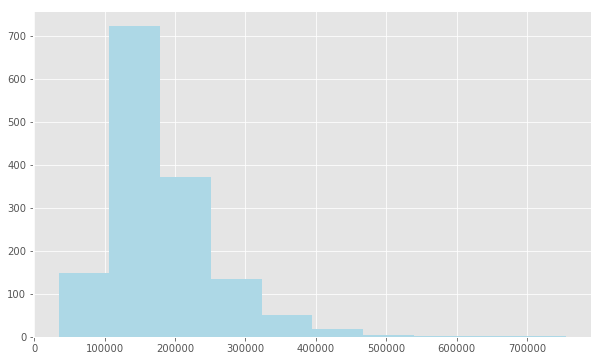

In [26]:
target = np.log(train.SalePrice)
print ("Skew is ", train.SalePrice.skew())
plt.hist(train.SalePrice, color='lightblue')
plt.show()
# np.log - will log transform the variable 
# np.exp - will reverse the prediction
# these things are required if the data is skewed
# As you can see the data is skewed very highly around 200k range

In [28]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

# Below list is showing all the columns that are numeric or related lines

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [37]:
corr = numeric_features.corr()

print (corr['SalePrice'].sort_values(ascending=False)[:5])
print ('\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

# Question: How the corr() function is able to find the columns that is impacting SalesPrice 
# what is the implementation behind it?
# Below is showing positive impact vs negative impacts
# There are three types of algorithms used in the corr functions: Pearson, Kendall and Spearman
# * pearson : standard correlation coefficient
# * kendall : Kendall Tau correlation coefficient (default)
# * spearman : Spearman rank correlation 

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64


YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


In [38]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

In [41]:
# Pivot the data based on the OverallQual and Sales Price to see the relationship deeper. Only median per quality score is 
# displayed below
quality_pivot = train.pivot_table(index='OverallQual', values = 'SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


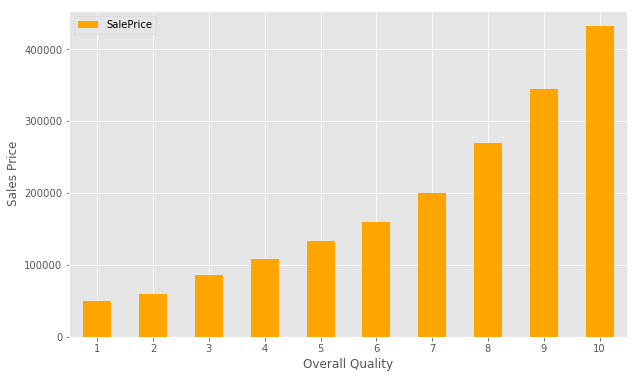

In [47]:
quality_pivot.plot(kind='bar', color='orange')
plt.xlabel('Overall Quality')
plt.ylabel('Sales Price')
plt.xticks(rotation=0)
plt.show()
# The below plot shows how the rate is increasing as per the overall quality of the house

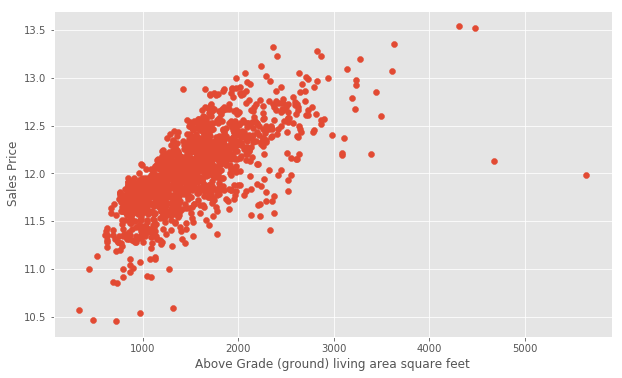

In [49]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.xlabel('Above Grade (ground) living area square feet')
plt.ylabel('Sales Price')
plt.show()

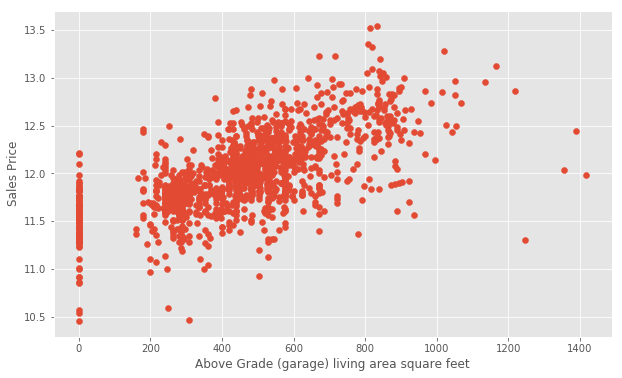

In [51]:
plt.scatter(x=train['GarageArea'], y=target)
plt.xlabel('Above Grade (garage) living area square feet')
plt.ylabel('Sales Price')
plt.show()

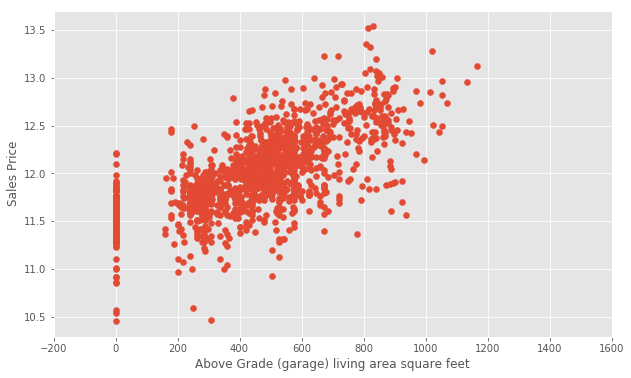

In [54]:
train = train[train['GarageArea'] < 1200 ]
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600)
plt.xlabel('Above Grade (garage) living area square feet')
plt.ylabel('Sales Price')
plt.show()

In [60]:
# try to find all the null counts
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
nulls

,Null Count
Feature,
PoolQC,1449
MiscFeature,1402
Alley,1364
Fence,1174
FireplaceQu,689
LotFrontage,258
GarageCond,81
GarageType,81
GarageYrBlt,81


In [61]:
# Misc Feature unique count check
print ("Unique values are:", train.MiscFeature.unique())


('Unique values are:', array([nan, 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object))


In [62]:
# data wrangling around text fields
categoricals = train.select_dtypes(exclude=[np.number]) # excluded number fields
categoricals.describe()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1455,1455,91,1455,1455,1455,1455,1455,1455,1455,...,1374,1374,1374,1374,1455,6,281,53,1455,1455
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Ex,MnPrv,Shed,WD,Normal
freq,1147,1450,50,921,1309,1454,1048,1378,225,1257,...,867,605,1306,1321,1335,2,157,48,1266,1196


The reason below i have written about One Hot encoding is to use the frequent values that are appearing per column and you can find different meaning out of them using this categorical classification feature.

ONE HOT ENCODING transforms categorical features to a format that works better with classification and regression algorithms.

Let’s take the following example. I have seven sample inputs of categorical data belonging to four categories. Now, I could encode these to nominal values as I have done here, but that wouldn’t make sense from a machine learning perspective. We can’t say that the category of “Penguin” is greater or smaller than “Human”. Then they would be ordinal values, not nominal.

What we do instead is generate one boolean column for each category. Only one of these columns could take on the value 1 for each sample. Hence, the term one hot encoding.

This works very well with most machine learning algorithms. Some algorithms, like random forests, handle categorical values natively. Then, one hot encoding is not necessary. The process of one hot encoding may seem tedious, but fortunately, most modern machine learning libraries can take care of it.

In [65]:
# Feature Application on Training data
# Feature 1: Street Type Encoding
print ("Original: \n") 
print (train.Street.value_counts(), "\n")

Original: 

(Pave    1454
Grvl       6
Name: Street, dtype: int64, '\n')


In [67]:
train['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
test['enc_street'] = pd.get_dummies(train.Street, drop_first=True)
print ('Encoded: \n') 
print (train.enc_street.value_counts())

Encoded: 

1    1454
0       6
Name: enc_street, dtype: int64


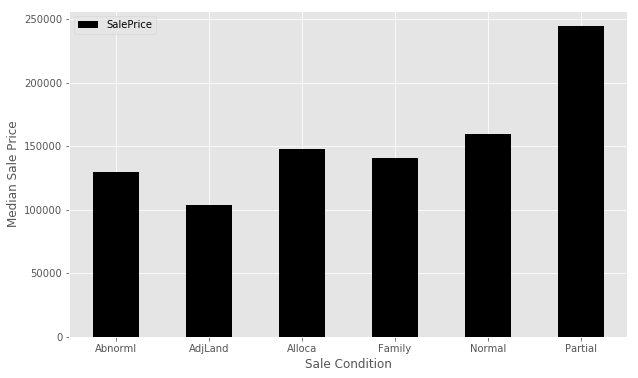

In [76]:
# Feature 2: Sales Condition
condition_pivot = train.pivot_table(index='SaleCondition',
                                    values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='black')
plt.xlabel('Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

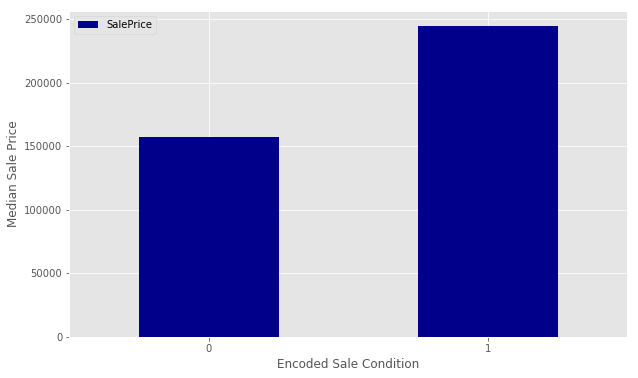

In [80]:
def encode(x): return 1 if x == 'Partial' else 0
train['enc_condition'] = train.SaleCondition.apply(encode)
test['enc_condition'] = test.SaleCondition.apply(encode)
condition_pivot = train.pivot_table(index='enc_condition', values='SalePrice', aggfunc=np.median)
condition_pivot.plot(kind='bar', color='darkblue')
plt.xlabel('Encoded Sale Condition')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

In [89]:
data = train.select_dtypes(include=[np.number]).interpolate().dropna()
sum(data.isnull().sum() != 0)
y = np.log(train.SalePrice)
X = data.drop(['SalePrice', 'Id'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.33)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)

In [92]:
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

('R^2 is: \n', 0.86474634105783255)
('RMSE is: \n', 0.023051468191911194)


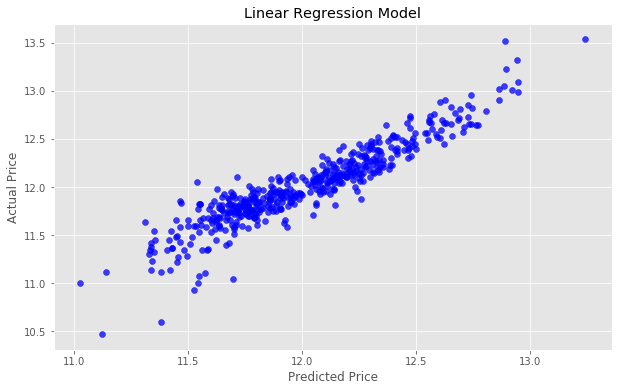

In [93]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')
plt.show()

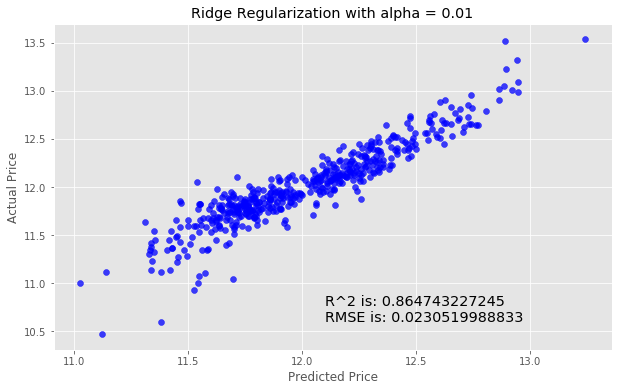

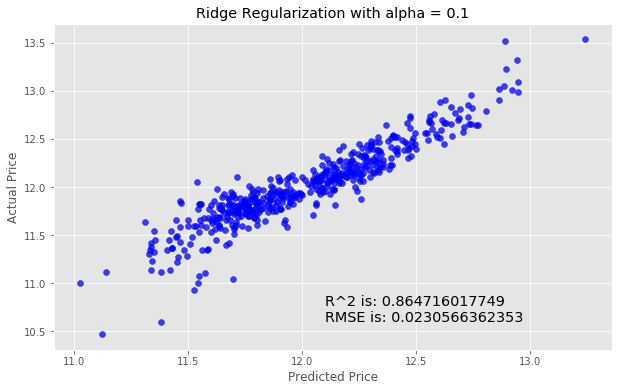

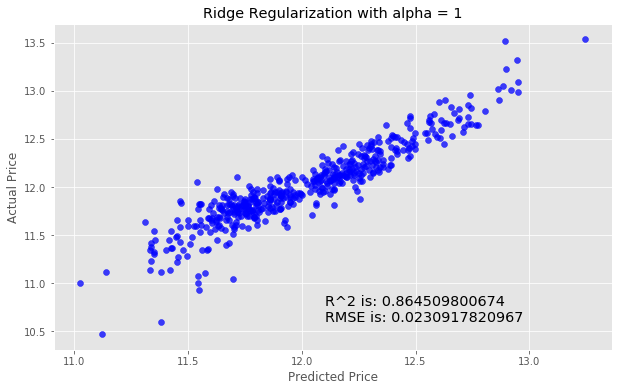

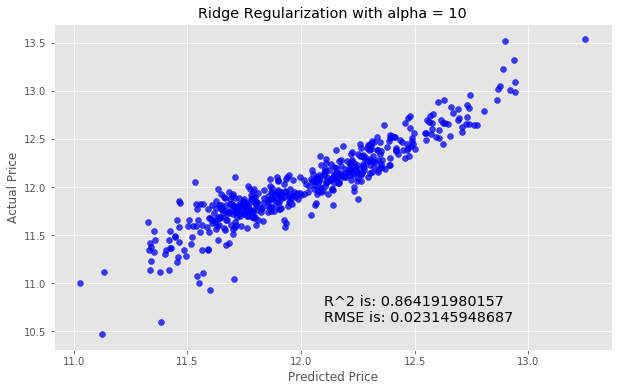

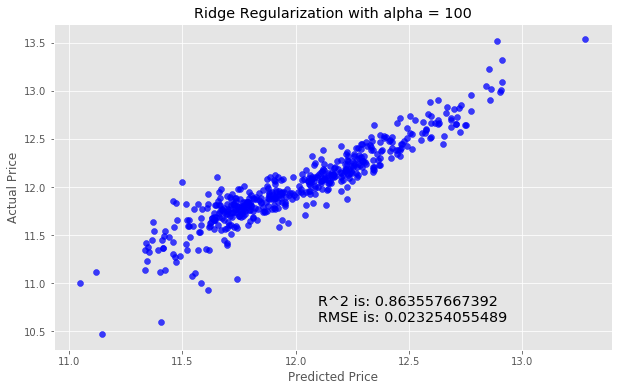

In [94]:
for i in range (-2, 3):
    alpha = 10**i
    rm = linear_model.Ridge(alpha=alpha)
    ridge_model = rm.fit(X_train, y_train)
    preds_ridge = ridge_model.predict(X_test)
    
    plt.scatter(preds_ridge, actual_values, alpha=.75, color='b')
    plt.xlabel('Predicted Price')
    plt.ylabel('Actual Price')
    plt.title('Ridge Regularization with alpha = {}'.format(alpha))
    overlay = 'R^2 is: {}\nRMSE is: {}'.format(
                    ridge_model.score(X_test, y_test),
                    mean_squared_error(y_test, preds_ridge))
    plt.annotate(s=overlay,xy=(12.1,10.6),size='x-large')
    plt.show()

In [95]:
submission = pd.DataFrame()
submission['Id'] = test.Id

In [99]:
feats = test.select_dtypes(
        include=[np.number]).drop(['Id'], axis=1).interpolate()
predictions = model.predict(feats)
final_predictions = np.exp(predictions)
print ("Original predictions are: \n", predictions[:5], "\n")
print ("Final predictions are: \n", final_predictions[:5])

('Original predictions are: \n', array([ 11.68856268,  11.71858472,  12.03237122,  12.18181274,  12.10677502]), '\n')
('Final predictions are: \n', array([ 119200.55374669,  122833.45845104,  168109.56584158,
        195206.40091533,  181094.63485685]))


In [100]:
submission['SalePrice'] = final_predictions
submission.head()

,Id,SalePrice
0,1461,119200.553747
1,1462,122833.458451
2,1463,168109.565842
3,1464,195206.400915
4,1465,181094.634857


In [101]:
submission.to_csv('submission1.csv', index=False)